In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\ys136\Desktop\Data Science\Diamond Price Prediction\Notebooks\data\gemstone.csv')

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df.shape

(193573, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df=df.drop(labels='id',axis=1)

In [9]:
numerical_col=df.columns[df.dtypes!='object']
categorical_col=df.columns[df.dtypes=='object']


In [10]:
numerical_col

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [11]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [12]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

from above information we can say that our data is imbalanced


In [13]:
df[numerical_col].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [14]:
df[categorical_col].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [15]:
df.color.value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [16]:
df.clarity.value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

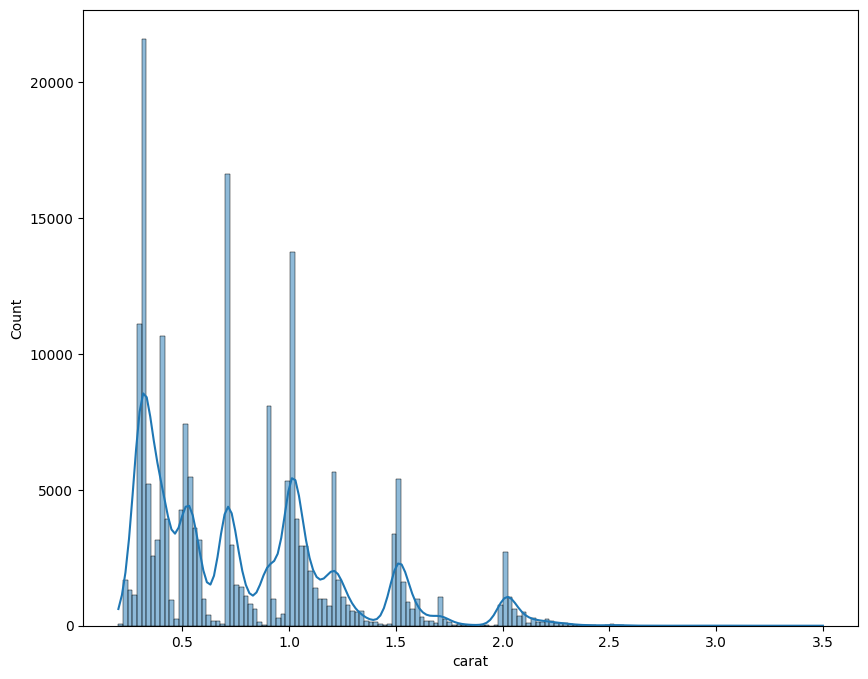

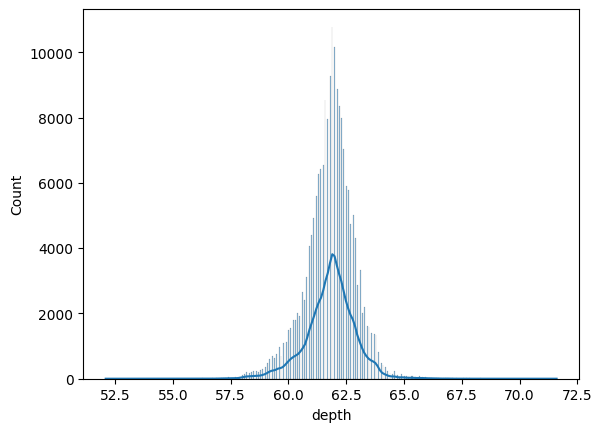

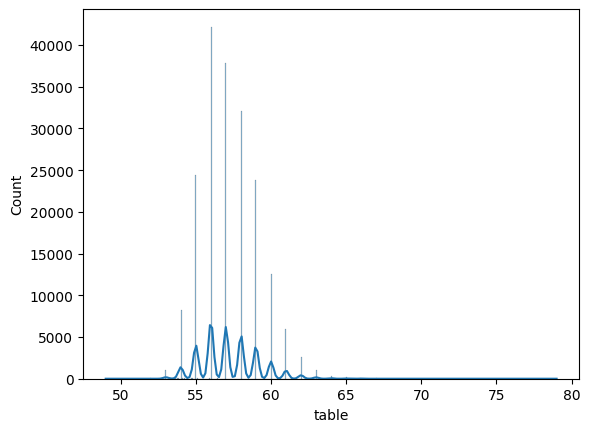

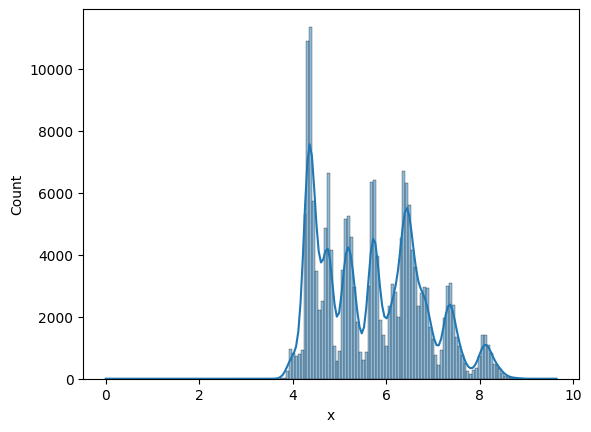

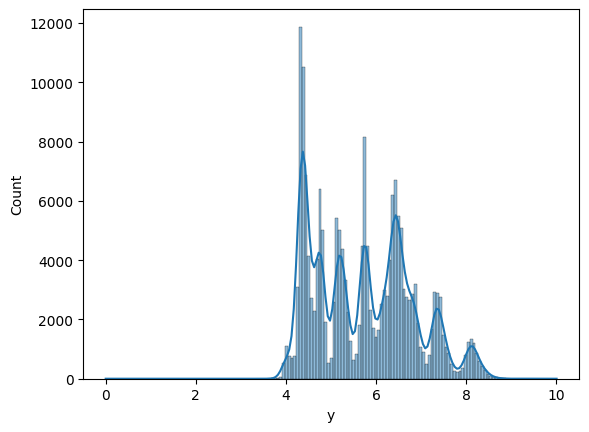

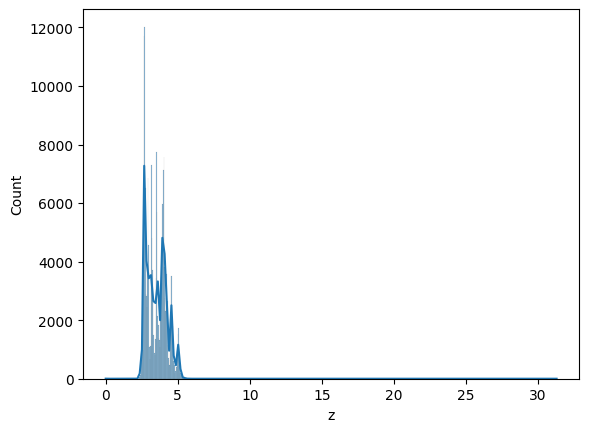

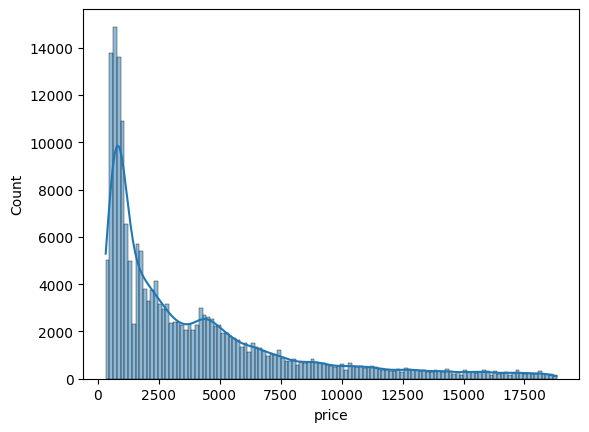

In [19]:
plt.figure(figsize=(10,8))
x=0
for i in numerical_col:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()




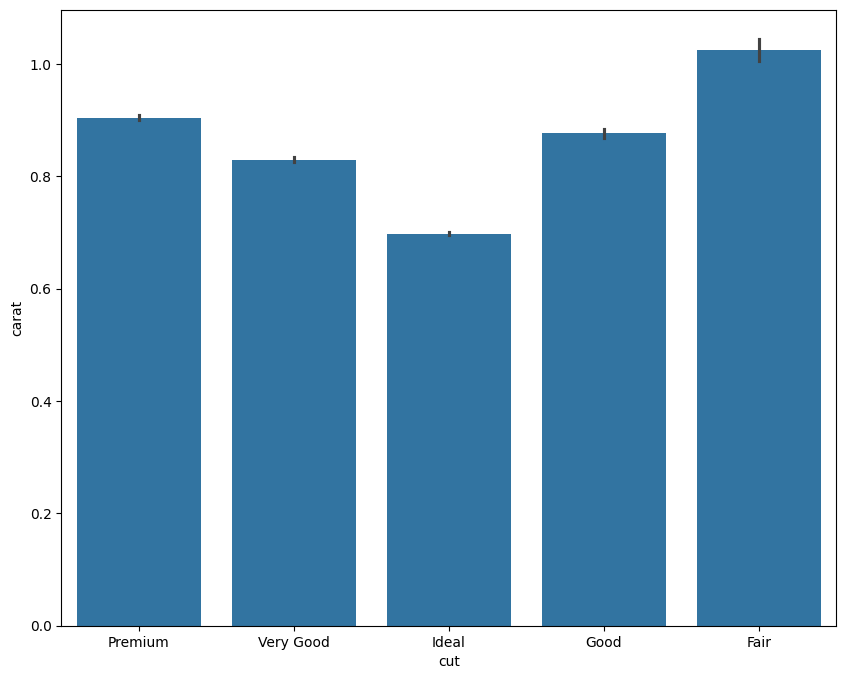

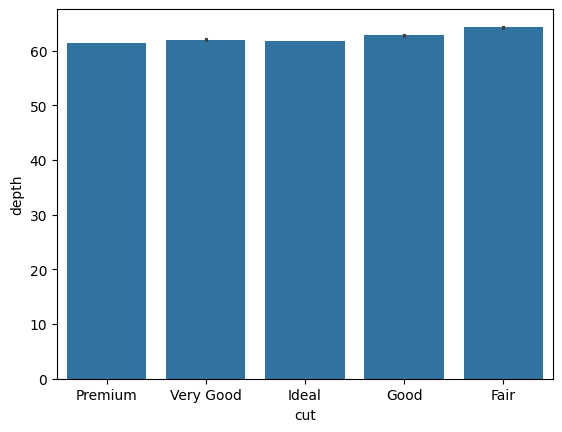

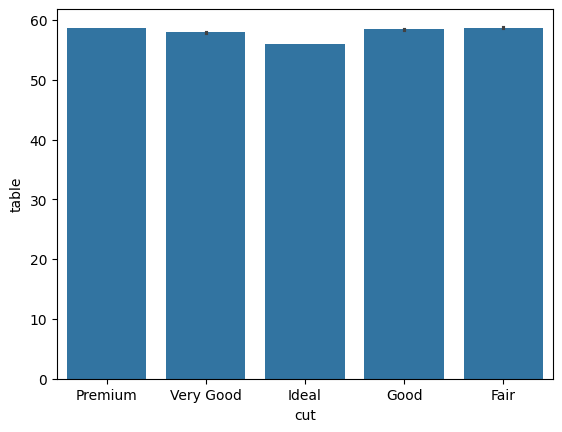

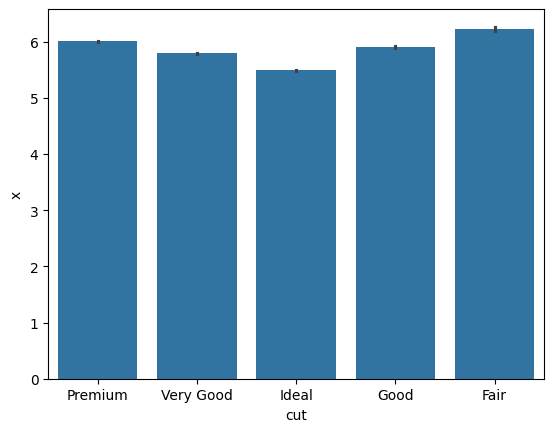

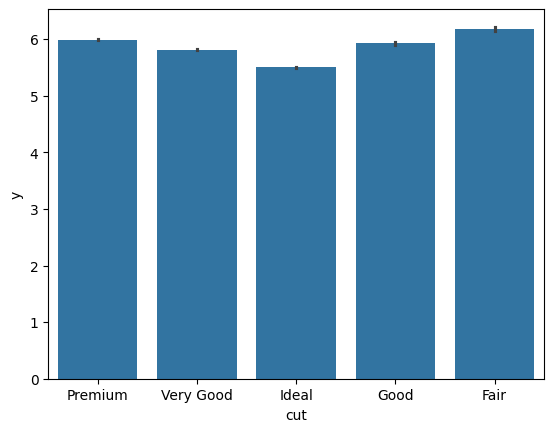

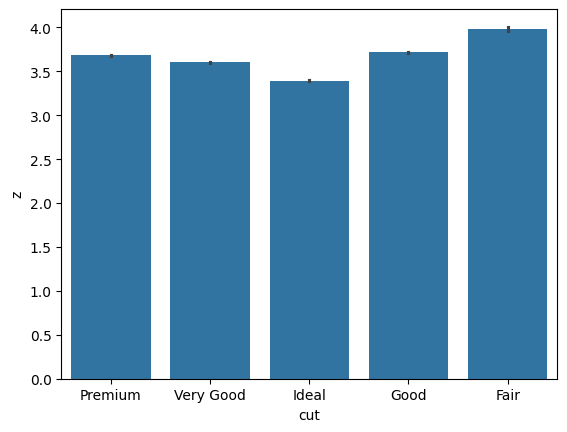

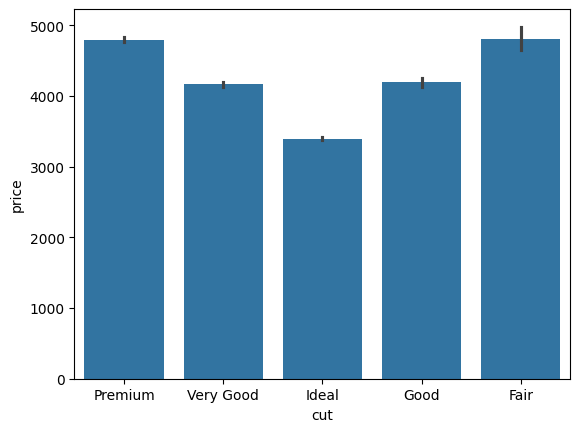

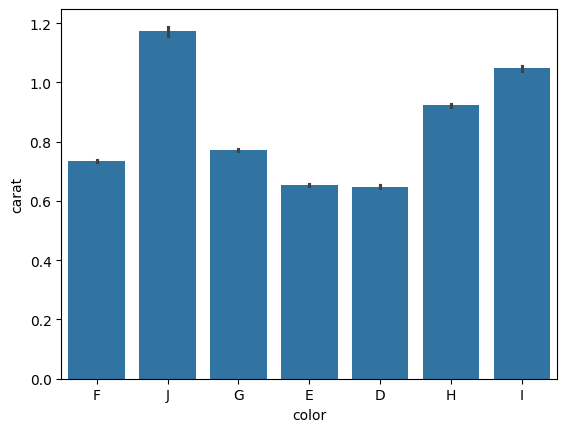

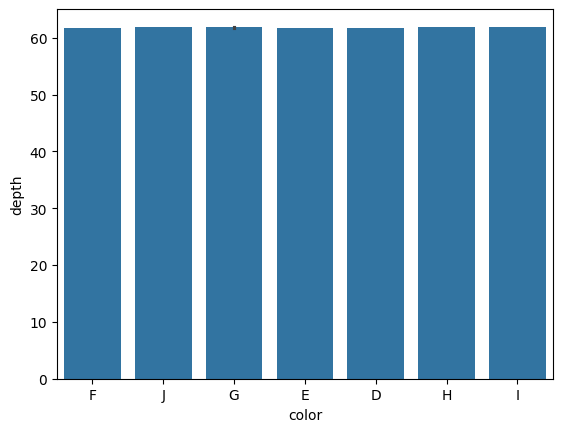

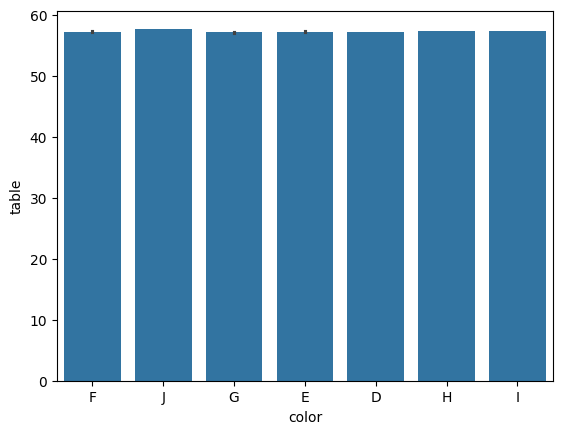

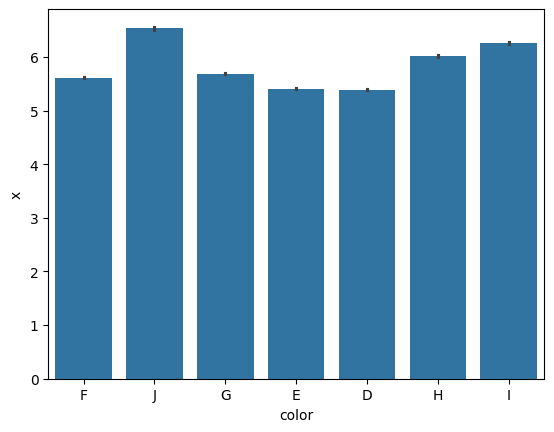

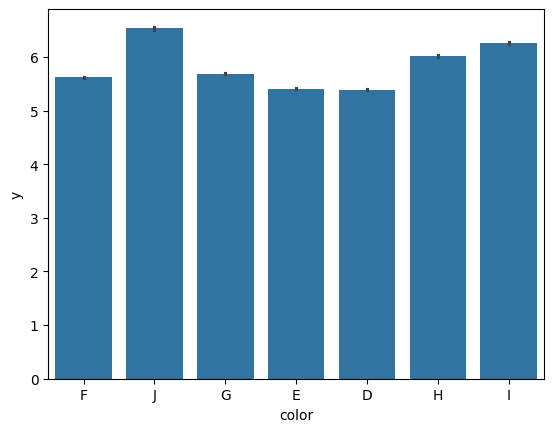

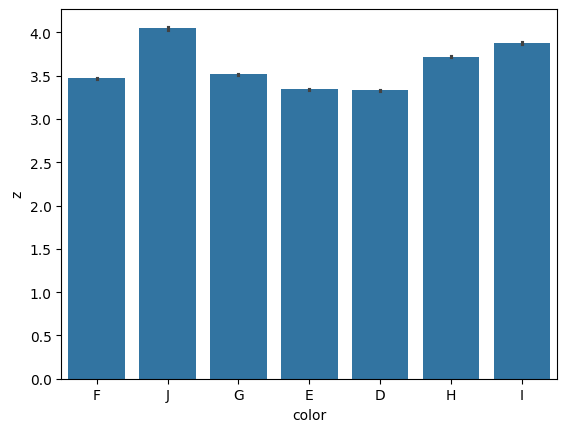

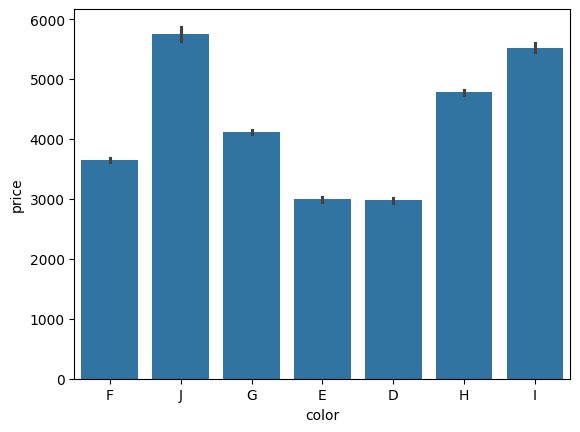

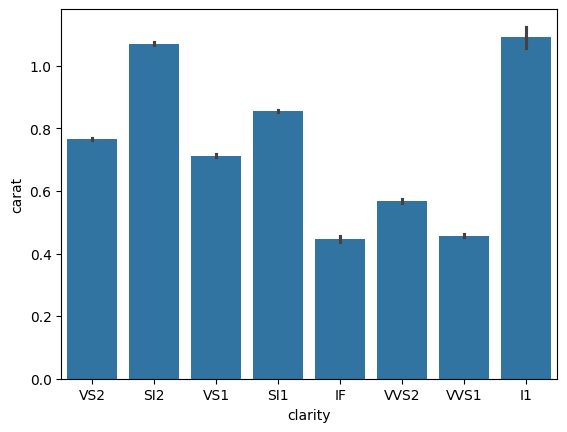

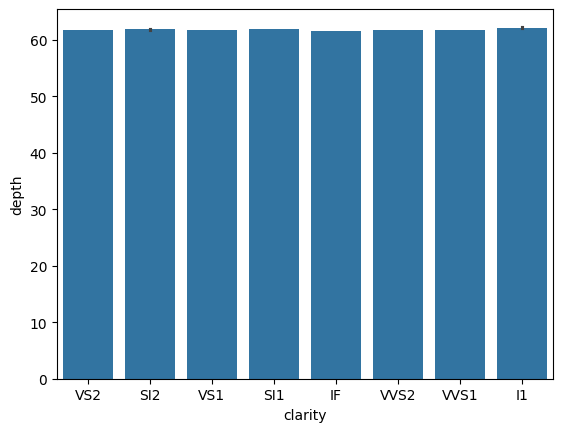

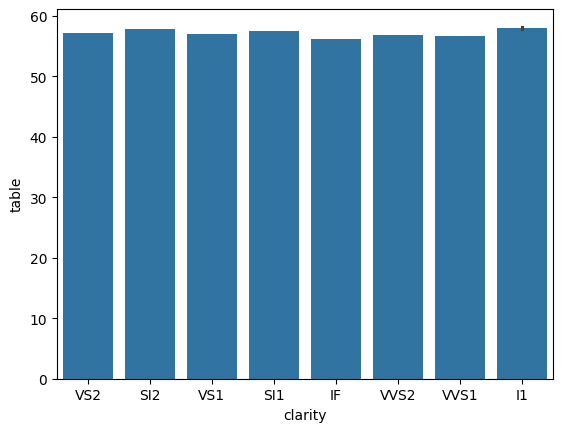

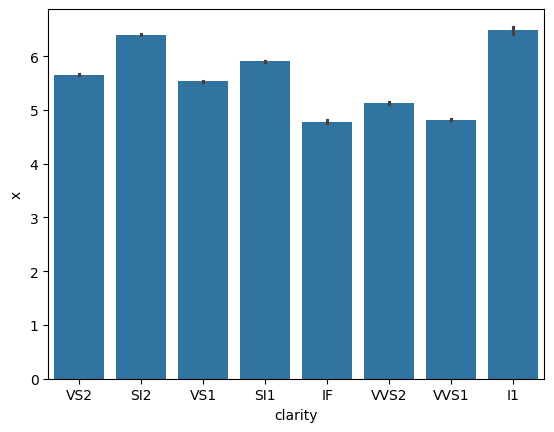

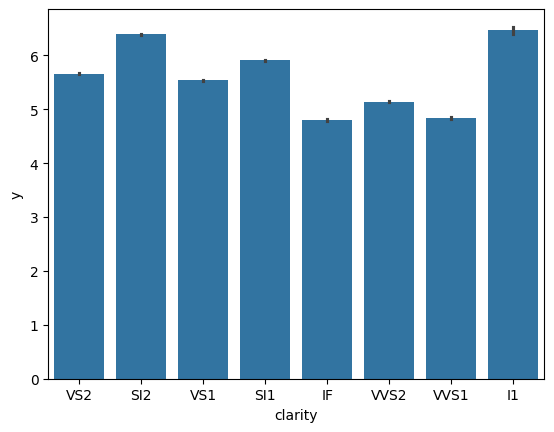

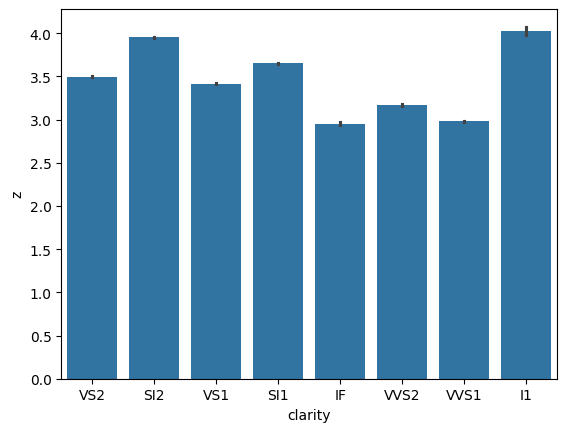

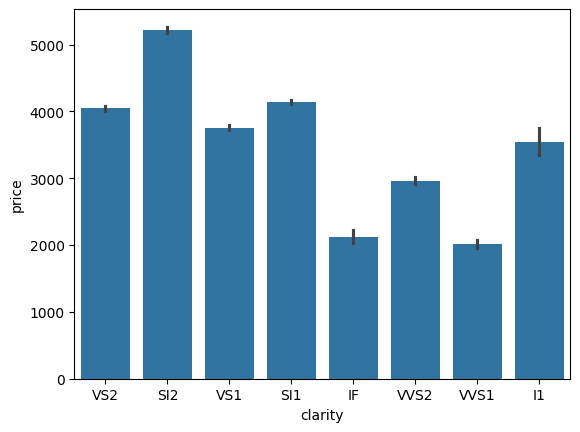

In [21]:
plt.figure(figsize=(10,8))
x=0
y=0
for i in categorical_col:
    for j in numerical_col:
        sns.barplot(data=df,x=i,y=j)
        print('\n')
        plt.show()



<Axes: >

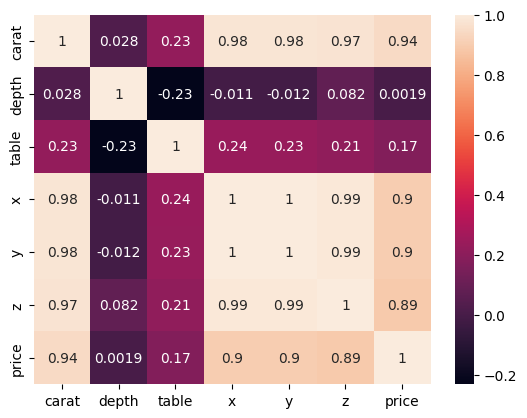

In [22]:
sns.heatmap(df[numerical_col].corr(),annot=True)

In [23]:
df.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [24]:
cut_map={'Fair':1,'Good':2,'Ideal':3,'Very Good':4,'Premium':5}

In [25]:
df.clarity.unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [26]:
clarity_map={'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

In [27]:
df.color.unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [28]:
color_map={'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}

In [32]:
df['cut']=df['cut'].map(cut_map)
df['color']=df['color'].map(color_map)
df['clarity']=df['clarity'].map(clarity_map)

In [33]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,5,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,3,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,3,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,5,4,4,62.6,59.0,7.65,7.61,4.77,14453
